# **U Net**

## **Connect with Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## **IMPORT PACKAGE**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from imageio import imread

print("CURRENT TENSORFLOW VERSION IS [%s]" % (tf.__version__))
print("PACKAGE LOADED")

CURRENT TENSORFLOW VERSION IS [1.14.0]
PACKAGE LOADED


##**IMAGE LOAD**

In [ ]:
!ls /gdrive/My\ Drive/Colab\ Notebooks/data/membrane

test  test-volume.tif  train  train-labels.tif	train-volume.tif


In [ ]:
paths = ["/gdrive/My Drive/Colab Notebooks/data/membrane/train/aug/",
        "/gdrive/My Drive/Colab Notebooks/data/membrane/test"]
categories = ['train', 'label', 'test']
#configurations
imgsize = [572,572]
data_name = "membrane"

nclass = len(paths)
valid_exts = [".jpg", ".tif", ".png", ".jpeg"]
imgcnt = 0

flist = os.listdir(paths[0])
for f in flist:
    if os.path.splitext(f)[1].lower() not in valid_exts:
        continue
    elif os.path.splitext(f)[0][0] == 'm':
        continue
    fullpath = os.path.join(paths[0], f)
    pathname = 'mask' + os.path.splitext(f)[0][5:] + os.path.splitext(f)[1]
    fullpath_label = os.path.join(paths[0], pathname)
    grayimg = imread(fullpath)
    labelimg = imread(fullpath_label)
    #RESIZE
    graysmall = Image.fromarray(grayimg).resize((imgsize[0],imgsize[1]))
    graysmall = np.array(graysmall)/255.
    grayvec = np.reshape(graysmall, (1,-1))
    graylabel = Image.fromarray(labelimg).resize((imgsize[0],imgsize[1]))
    graylabel = np.array(graylabel)/255.
    graylabel = graylabel[92:92+388,92:92+388]
    grayvec_label = np.reshape(graylabel, (1,-1))
    #SAVE
    #curr_label = np.eye(nclass, nclass)[i:i+1,:]
    if imgcnt is 0:
        train_image = grayvec
        train_label = grayvec_label
    else:
        train_image = np.concatenate((train_image,grayvec), axis = 0)
        train_label = np.concatenate((train_label,grayvec_label), axis = 0)
    imgcnt = imgcnt + 1
print("TOTAL %d TRAIN IMAGES" % imgcnt)


imgcnt = 0
flist = os.listdir(paths[1])
for f in flist:
    if os.path.splitext(f)[1].lower() not in valid_exts:
        continue
    elif len(os.path.splitext(f)[0]) > 4:
        continue
    fullpath = os.path.join(paths[1], f)
    pathname = os.path.splitext(f)[0] + '_predict' + os.path.splitext(f)[1]
    fullpath_label = os.path.join(paths[1], pathname)
    grayimg = imread(fullpath)
    labelimg = imread(fullpath_label)
    #RESIZE
    graysmall = Image.fromarray(grayimg).resize((imgsize[0],imgsize[1]))
    graysmall = np.array(graysmall)/255.
    grayvec = np.reshape(graysmall, (1,-1))
    graylabel = Image.fromarray(labelimg).resize((imgsize[0],imgsize[1]))
    graylabel = np.array(graylabel)/255.
    graylabel = graylabel[92:92+388,92:92+388]
    grayvec_label = np.reshape(graylabel, (1,-1))
    #SAVE
    #curr_label = np.eye(nclass, nclass)[i:i+1,:]
    if imgcnt is 0:
        test_image = grayvec
        test_label = grayvec_label
    else:
        test_image = np.concatenate((test_image,grayvec), axis = 0)
        test_label = np.concatenate((test_label,grayvec_label), axis = 0)
    imgcnt = imgcnt + 1
print("TOTAL %d TEST IMAGES" % imgcnt)



TOTAL 60 TRAIN IMAGES
TOTAL 30 TEST IMAGES


##**DATA PROCESS**

##**DATA AUGMENTATION**

In [ ]:
##NEXT TIME....

##**DEFINE MODEL**

In [ ]:
#NETWORK TOPOLOGIES
n_input = 572*572
n_channel = 64
n_classes = 2
n_output = 388*388

#INPUTS AND OUTPUTS
x = tf.compat.v1.placeholder("float", [None, n_input])
y = tf.compat.v1.placeholder("float", [None, n_output])

#NETWORK PARAMETERS
weights = {
    #c: 3*3 conv
    'c1' : tf.Variable(tf.random.normal([3,3,1,n_channel], stddev = np.sqrt(2/(3*3)))),
    'c2' : tf.Variable(tf.random.normal([3,3,n_channel,n_channel], stddev = np.sqrt(2/(3*3*n_channel)))),
    'c3' : tf.Variable(tf.random.normal([3,3,n_channel,n_channel*2], stddev = np.sqrt(2/(3*3*n_channel)))),
    'c4' : tf.Variable(tf.random.normal([3,3,n_channel*2,n_channel*2], stddev = np.sqrt(2/(3*3*n_channel*2)))),
    'c5' : tf.Variable(tf.random.normal([3,3,n_channel*2,n_channel*4], stddev = np.sqrt(2/(3*3*n_channel*2)))),
    'c6' : tf.Variable(tf.random.normal([3,3,n_channel*4,n_channel*4], stddev = np.sqrt(2/(3*3*n_channel*4)))),
    'c7' : tf.Variable(tf.random.normal([3,3,n_channel*4,n_channel*8], stddev = np.sqrt(2/(3*3*n_channel*4)))),
    'c8' : tf.Variable(tf.random.normal([3,3,n_channel*8,n_channel*8], stddev = np.sqrt(2/(3*3*n_channel*8)))),
    'c9' : tf.Variable(tf.random.normal([3,3,n_channel*8,n_channel*16], stddev = np.sqrt(2/(3*3*n_channel*8)))),
    'c10' : tf.Variable(tf.random.normal([3,3,n_channel*16,n_channel*16], stddev = np.sqrt(2/(3*3*n_channel*16)))),
    'c11' : tf.Variable(tf.random.normal([3,3,n_channel*16,n_channel*8], stddev = np.sqrt(2/(3*3*n_channel*16)))),
    'c12' : tf.Variable(tf.random.normal([3,3,n_channel*8,n_channel*8], stddev = np.sqrt(2/(3*3*n_channel*8)))),
    'c13' : tf.Variable(tf.random.normal([3,3,n_channel*8,n_channel*4], stddev = np.sqrt(2/(3*3*n_channel*8)))),
    'c14' : tf.Variable(tf.random.normal([3,3,n_channel*4,n_channel*4], stddev = np.sqrt(2/(3*3*n_channel*4)))),
    'c15' : tf.Variable(tf.random.normal([3,3,n_channel*4,n_channel*2], stddev = np.sqrt(2/(3*3*n_channel*4)))),
    'c16' : tf.Variable(tf.random.normal([3,3,n_channel*2,n_channel*2], stddev = np.sqrt(2/(3*3*n_channel*2)))),
    'c17' : tf.Variable(tf.random.normal([3,3,n_channel*2,n_channel], stddev = np.sqrt(2/(3*3*n_channel*2)))),
    'c18' : tf.Variable(tf.random.normal([3,3,n_channel,n_channel], stddev = np.sqrt(2/(3*3*n_channel)))),
    'c19' : tf.Variable(tf.random.normal([1,1,n_channel,1], stddev = np.sqrt(2/n_channel))),
    #uc: 2*2 up-conv
    'uc1' : tf.Variable(tf.random.normal([2,2,n_channel*8,n_channel*16], stddev = np.sqrt(2/(2*2*n_channel*16)))),
    'uc2' : tf.Variable(tf.random.normal([2,2,n_channel*4,n_channel*8], stddev = np.sqrt(2/(2*2*n_channel*8)))),
    'uc3' : tf.Variable(tf.random.normal([2,2,n_channel*2,n_channel*4], stddev = np.sqrt(2/(2*2*n_channel*4)))),
    'uc4' : tf.Variable(tf.random.normal([2,2,n_channel,n_channel*2], stddev = np.sqrt(2/(2*2*n_channel*2))))
}
# biases = {
#     'c1' : tf.Variable(tf.random.normal([n_channel], stddev = stddev)),
#     'c2' : tf.Variable(tf.random.normal([128], stddev = stddev)),
#     'd1' : tf.Variable(tf.random.normal([n_classes],stddev = stddev))
# }
print("NETWORK READY")

NETWORK READY


##**DEFINE GRAPH**

In [ ]:
##different cost
#MODEL

def UNET(_x, _w):
    #RESHAPE
    _x_r = tf.reshape(_x, shape = [-1,572,572,1])
    #CONVOLUTION1
    _conv1 = tf.nn.conv2d(_x_r, _w['c1'], strides = [1,1,1,1], padding = 'VALID')
    #RELU1
    _actv1 = tf.nn.relu(_conv1)
    #CONVOLUTION2
    _conv2 = tf.nn.conv2d(_actv1, _w['c2'], strides = [1,1,1,1], padding = 'VALID')
    #RELU2
    _actv2 = tf.nn.relu(_conv2)
    #MAX-POOL
    _pool1 = tf.nn.max_pool2d(_actv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    #FOR CROP AND CONCAT
    _concat1 = _actv2
    
    #SECOND DOWNSAMPLING LAYER
    _temp = tf.nn.conv2d(_pool1, _w['c3'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c4'], strides = [1,1,1,1], padding = 'VALID')
    _concat2 = tf.nn.relu(_temp)
    _temp = tf.nn.max_pool2d(_concat2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    #THIRD DOWNSAMPLING LAYER
    _temp = tf.nn.conv2d(_temp, _w['c5'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c6'], strides = [1,1,1,1], padding = 'VALID')
    _concat3 = tf.nn.relu(_temp)
    _temp = tf.nn.max_pool2d(_concat3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    #FORTH DOWNSAMPLING LAYER
    _temp = tf.nn.conv2d(_temp, _w['c7'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c8'], strides = [1,1,1,1], padding = 'VALID')
    _concat4 = tf.nn.relu(_temp)
    _temp = tf.nn.max_pool2d(_concat4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    #FIRST UPSAMPLING LAYER
    _temp = tf.nn.conv2d(_temp, _w['c9'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c10'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d_transpose(_temp, _w['uc1'], output_shape = (4,56,56,512), strides = [1,2,2,1], padding = 'VALID')
    #CROP AND CONCAT
    _concat4 = tf.slice(_concat4, [0,4,4,0], [-1,56,56,512])
    _temp = tf.concat([_concat4,_temp],3)

    #SECOND UPSAMPLING LAYER
    _temp = tf.nn.conv2d(_temp, _w['c11'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c12'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d_transpose(_temp, _w['uc2'], output_shape = (4,104,104,256), strides = [1,2,2,1], padding = 'VALID')
    #CROP AND CONCAT
    _concat3 = tf.slice(_concat3, [0,16,16,0], [-1,104,104,256])
    _temp = tf.concat([_concat3,_temp],3)

    #THIRD UPSAMPLING LAYER
    _temp = tf.nn.conv2d(_temp, _w['c13'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c14'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d_transpose(_temp, _w['uc3'], output_shape = (4,200,200,128), strides = [1,2,2,1], padding = 'VALID')
    #CROP AND CONCAT
    _concat2 = tf.slice(_concat2, [0,40,40,0], [-1,200,200,128])
    _temp = tf.concat([_concat2,_temp],3)

    #FORTH UPSAMPLING LAYER
    _temp = tf.nn.conv2d(_temp, _w['c15'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c16'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d_transpose(_temp, _w['uc4'], output_shape = (4,392,392,64), strides = [1,2,2,1], padding = 'VALID')
    #CROP AND CONCAT
    _concat1 = tf.slice(_concat1, [0,88,88,0], [-1,392,392,64])
    _temp = tf.concat([_concat1,_temp],3)
    ##OUTPUT LAYER
    _temp = tf.nn.conv2d(_temp, _w['c17'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _temp = tf.nn.conv2d(_temp, _w['c18'], strides = [1,1,1,1], padding = 'VALID')
    _temp = tf.nn.relu(_temp)
    _logit = tf.nn.conv2d(_temp, _w['c19'], strides = [1,1,1,1], padding = 'VALID')

    #OUT
    _out = {
        'x_r' : _x_r,
        'conv1' : _conv1,
        'conv2' : _conv2,
        'pool' : _pool1,
        'logit' : _logit
    }
    return _out

#PREDICTION
cnnout = UNET(x, weights)

#LOSS AND OPTIMIZER
cost = tf.losses.sigmoid_cross_entropy(tf.reshape(y, shape = [-1,388,388,1]), cnnout['logit'])
#optm = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
optm = tf.compat.v1.train.MomentumOptimizer(learning_rate = 0.001, momentum = 0.99).minimize(cost)
corr = tf.equal(tf.argmax(cnnout['logit'],1), tf.argmax(tf.reshape(y, shape = [-1,388,388,1]),1))
accr = tf.reduce_mean(tf.cast(corr, 'float'))

#INITIALIZER
init = tf.compat.v1.global_variables_initializer()
print("FUNCTIONS READY")


FUNCTIONS READY


##**SAVER**

In [ ]:
##SAVER
savedir = "nets/unet_simple/"
saver = tf.compat.v1.train.Saver(max_to_keep = 3)
save_step = 5
if not os.path.exists(savedir):
    os.makedirs(savedir)
print("SAVER READY")

SAVER READY


##**RUN**

In [ ]:
#PARAMETERS
training_epochs = 100
batch_size = 5
display_step = int(100/6)
#LAUNCH THE GRAPH
sess = tf.compat.v1.Session()
sess.run(init)
#OPTIMIZE
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(len(train_image)/batch_size)
    #ITERATION
    for i in range(total_batch):
        batch_xs = train_image[i*batch_size:(i+1)*batch_size-1, :]
        batch_ys = train_label[i*batch_size:(i+1)*batch_size-1, :]
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict = feeds)
        avg_cost += sess.run(cost, feed_dict = feeds)
    avg_cost = avg_cost / total_batch
    #DISPLAY
    if (epoch+1) % display_step == 0:
        print("Epoch: %03d/%03d cost: %.9f" % (epoch+1, training_epochs, avg_cost))
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        print("TRAIN ACCURACY: %.3f" % (train_acc))
        feeds = {x: test_image[int((epoch+1)/display_step) - 1: int((epoch+1)/display_step) + batch_size - 2, :], y: test_label[int((epoch+1)/display_step) - 1: int((epoch+1)/display_step) + batch_size - 2, :]}
        test_acc = sess.run(accr, feed_dict=feeds)
        print("TEST ACCURACY: %.3f" % (test_acc))
    #SAVE
    if (epoch+1) % save_step == 0:
        savename = savedir+"net-"+str(epoch+1)+".ckpt"
        saver.save(sess, savename)
        print("[%s] SAVED." % (savename))
print("OPTIMIZATION FINISHED")


[nets/unet_simple/net-5.ckpt] SAVED.
[nets/unet_simple/net-10.ckpt] SAVED.
[nets/unet_simple/net-15.ckpt] SAVED.
Epoch: 016/100 cost: 0.334571958
TRAIN ACCURACY: 0.007
TEST ACCURACY: 0.003
[nets/unet_simple/net-20.ckpt] SAVED.
[nets/unet_simple/net-25.ckpt] SAVED.
[nets/unet_simple/net-30.ckpt] SAVED.
Epoch: 032/100 cost: 0.308716225
TRAIN ACCURACY: 0.013
TEST ACCURACY: 0.009
[nets/unet_simple/net-35.ckpt] SAVED.
[nets/unet_simple/net-40.ckpt] SAVED.
[nets/unet_simple/net-45.ckpt] SAVED.
Epoch: 048/100 cost: 0.284389834
TRAIN ACCURACY: 0.011
TEST ACCURACY: 0.005
[nets/unet_simple/net-50.ckpt] SAVED.
[nets/unet_simple/net-55.ckpt] SAVED.
[nets/unet_simple/net-60.ckpt] SAVED.
Epoch: 064/100 cost: 0.259680637
TRAIN ACCURACY: 0.013
TEST ACCURACY: 0.006
[nets/unet_simple/net-65.ckpt] SAVED.
[nets/unet_simple/net-70.ckpt] SAVED.
[nets/unet_simple/net-75.ckpt] SAVED.
Epoch: 080/100 cost: 0.213207424
TRAIN ACCURACY: 0.010
TEST ACCURACY: 0.005
[nets/unet_simple/net-80.ckpt] SAVED.
[nets/unet_si

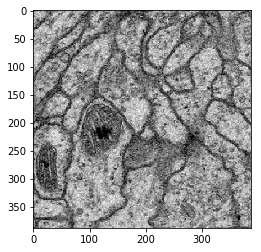

In [ ]:
feeds = {x: test_image[int((epoch+1)/display_step) - 1: int((epoch+1)/display_step) + batch_size - 2, :], y: test_label[int((epoch+1)/display_step) - 1: int((epoch+1)/display_step) + batch_size - 2, :]}
result = sess.run(cnnout, feed_dict=feeds)
img12 = np.array(result['logit'][0,:,:,0])
img123 = np.array(result['x_r'][0,92:92+388,92:92+388,0])
plt.imshow(img123, 'gray')
#plt.imshow(img12)

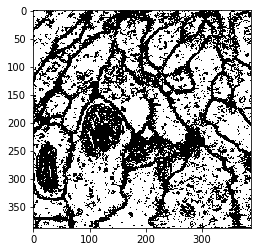

In [ ]:
for i in range(388):
  for j in range(388):
    if img123[i,j] > 0.5:
      img123[i,j] = 1
    else:
      img123[i,j] = 0
    
plt.imshow(img123, 'gray')

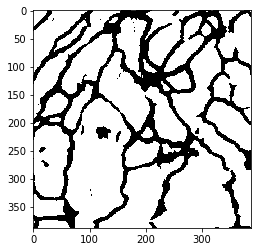

In [ ]:
plt.imshow(img12, 'gray')

##**RESTORE**

In [ ]:
  do_restore = 1
if do_restore == 1:
    sess = tf.Session()
    epoch = 20
    savename = savedir + "net-" + str(epoch) + ".ckpt"
    saver.restore(sess, savename)
    print("NETWORK RESTORED")
else:
    print("DO NOTHING")

W0811 15:08:14.382283 140252377634688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


ValueError: ignored